# Brain Age Prediction Lasso

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [8]:
from sklearn.linear_model import Lasso
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class LassoRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Lasso
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = LassoRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'darkorange'
nameset = 'Lasso'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}BrainAge_MachineLearning_MultipleModels/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [84]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [ ]:
with open(f'results_model/opt_model.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [7]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

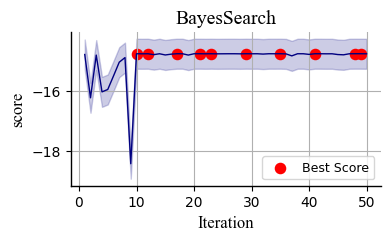

Top 1: Iteration 48, Score -14.764494311051095
Top 2: Iteration 35, Score -14.764587455493578
Top 3: Iteration 49, Score -14.76468433761697
Top 4: Iteration 29, Score -14.764873469307712
Top 5: Iteration 10, Score -14.764913505697132
Top 6: Iteration 21, Score -14.764967410947827
Top 7: Iteration 17, Score -14.765038844299536
Top 8: Iteration 41, Score -14.765054203870708
Top 9: Iteration 23, Score -14.765169845547652
Top 10: Iteration 12, Score -14.765249004782493


In [8]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [9]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.012965511318355298, 'max_iter': 7143, 'tol': 0.01},
 {'alpha': 0.012712995741233486, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.011005572844160953, 'max_iter': 7598, 'tol': 0.01},
 {'alpha': 0.001, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.0010340016434251915,
  'max_iter': 8197,
  'tol': 0.0016743576591267016},
 {'alpha': 0.001, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.0012377944260182473, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.0011031853249647196, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.0012694884754170647, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.0016559191667612206, 'max_iter': 8749, 'tol': 0.01}]

In [9]:
best_params=opt_model.best_params_

# Training

In [10]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [93]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [ ]:
# with open('results_model/results_training.pkl', 'wb') as f:
#     pickle.dump(results_training, f)

In [6]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

In [11]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# Crear listas para almacenar las métricas de cada fold
mae_list = []
mae_corrected_list = []
r2_list = []
r2_corrected_list = []

# Iterar sobre cada DataFrame en la lista
for df in results_per_fold_CN_test:
    # Calcular MAE y R2 para y_pred
    mae = mean_absolute_error(df['y_labels'], df['y_pred'])
    r2 = r2_score(df['y_labels'], df['y_pred'])
    
    # Calcular MAE y R2 para y_pred_corrected
    mae_corrected = mean_absolute_error(df['y_labels'], df['y_pred_corrected'])
    r2_corrected = r2_score(df['y_labels'], df['y_pred_corrected'])
    
    # Agregar los valores a las listas
    mae_list.append(mae)
    mae_corrected_list.append(mae_corrected)
    r2_list.append(r2)
    r2_corrected_list.append(r2_corrected)

# Crear un DataFrame con los resultados
metrics_df = pd.DataFrame({
    'Fold': range(1, len(results_per_fold_CN_test) + 1),
    'MAE': mae_list,
    'MAE_corrected': mae_corrected_list,
    'R2': r2_list,
    'R2_corrected': r2_corrected_list
})

# Mostrar las primeras filas del DataFrame de métricas
print(metrics_df.head())


   Fold        MAE  MAE_corrected        R2  R2_corrected
0     1  14.843833       8.179534  0.249440      0.742824
1     2  14.235337       8.357530  0.316703      0.686341
2     3  16.604455       8.494696  0.153943      0.767082
3     4  15.591028       7.680581  0.203091      0.786850
4     5  15.843182       9.254183  0.109189      0.665845


In [12]:
output_file = "results/metrics_results_per_fold.xlsx"
metrics_df.to_excel(output_file, index=False, engine='openpyxl')

In [9]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_results = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')


In [14]:
df_CN_results.to_excel('results/df_CN_results_training.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     5129.
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:16:12   Log-Likelihood:                -4941.7
No. Observations:                1323   AIC:                             9887.
Df Residuals:                    1321   BIC:                             9898.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3230      0.704      1.879      0.0

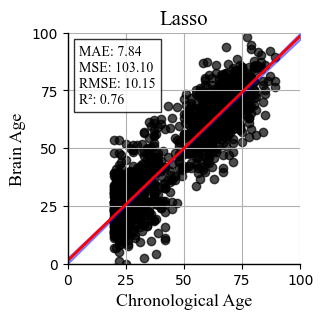

Error medio absoluto: 7.842393640976491
Error cuadrático medio: 103.09641993218908
Raíz del error cuadrático medio: 10.153640723020935
Coeficiente de determinación (R²): 0.7558007044013019


In [7]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [13]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_OCC_left: 13447.095370078923
High_subj_spec_EPP_OCC_left: 7039.885003721599
Low_subj_spec_RPD_CING_right: 6037.485363315451
Low_subj_spec_RPD_PARIET_left: 5790.006349336026
High_subj_spec_RPD_OCC_left: 5240.840761764556
Low_subj_spec_EPP_CING_left: 5114.648015096693
Alpha2_canon_EPP_HPC_left: 4517.647981390074
Low_subj_spec_EPP_HPC_left: 4213.979280752843
Low_subj_spec_RPD_CING_left: 4105.66446143213
High_subj_spec_RPD_CING_left: 3953.8683373832187
Low_subj_spec_EPP_HPC_right: 3505.736065907141
Low_subj_spec_EPP_PARIET_left: 3493.252760001082
Low_subj_spec_RPD_PARIET_right: 3244.4535717823915
IAF_OCC_right: 3110.009270430868
High_subj_spec_RPD_HPC_right: 3014.9917669747097
Alpha2_canon_EPP_OCC_left: 3009.8410166347203
Alpha2_canon_RPD_OCC_left: 2928.444705246186
TF_MFG_right: 2777.675330330857
IAF_INS_right: 2681.898849483991
Low_subj_spec_EPP_OCC_left: 2445.598164544968
IAF_IFG_right: 2243.793796110775
Hi

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [7]:
shap_summary_sorted_CN

[('Low_subj_spec_RPD_OCC_left', 13447.095370078923),
 ('High_subj_spec_EPP_OCC_left', 7039.885003721599),
 ('Low_subj_spec_RPD_CING_right', 6037.485363315451),
 ('Low_subj_spec_RPD_PARIET_left', 5790.006349336026),
 ('High_subj_spec_RPD_OCC_left', 5240.840761764556),
 ('Low_subj_spec_EPP_CING_left', 5114.648015096693),
 ('Alpha2_canon_EPP_HPC_left', 4517.647981390074),
 ('Low_subj_spec_EPP_HPC_left', 4213.979280752843),
 ('Low_subj_spec_RPD_CING_left', 4105.66446143213),
 ('High_subj_spec_RPD_CING_left', 3953.8683373832187),
 ('Low_subj_spec_EPP_HPC_right', 3505.736065907141),
 ('Low_subj_spec_EPP_PARIET_left', 3493.252760001082),
 ('Low_subj_spec_RPD_PARIET_right', 3244.4535717823915),
 ('IAF_OCC_right', 3110.009270430868),
 ('High_subj_spec_RPD_HPC_right', 3014.9917669747097),
 ('Alpha2_canon_EPP_OCC_left', 3009.8410166347203),
 ('Alpha2_canon_RPD_OCC_left', 2928.444705246186),
 ('TF_MFG_right', 2777.675330330857),
 ('IAF_INS_right', 2681.898849483991),
 ('Low_subj_spec_EPP_OCC_left'

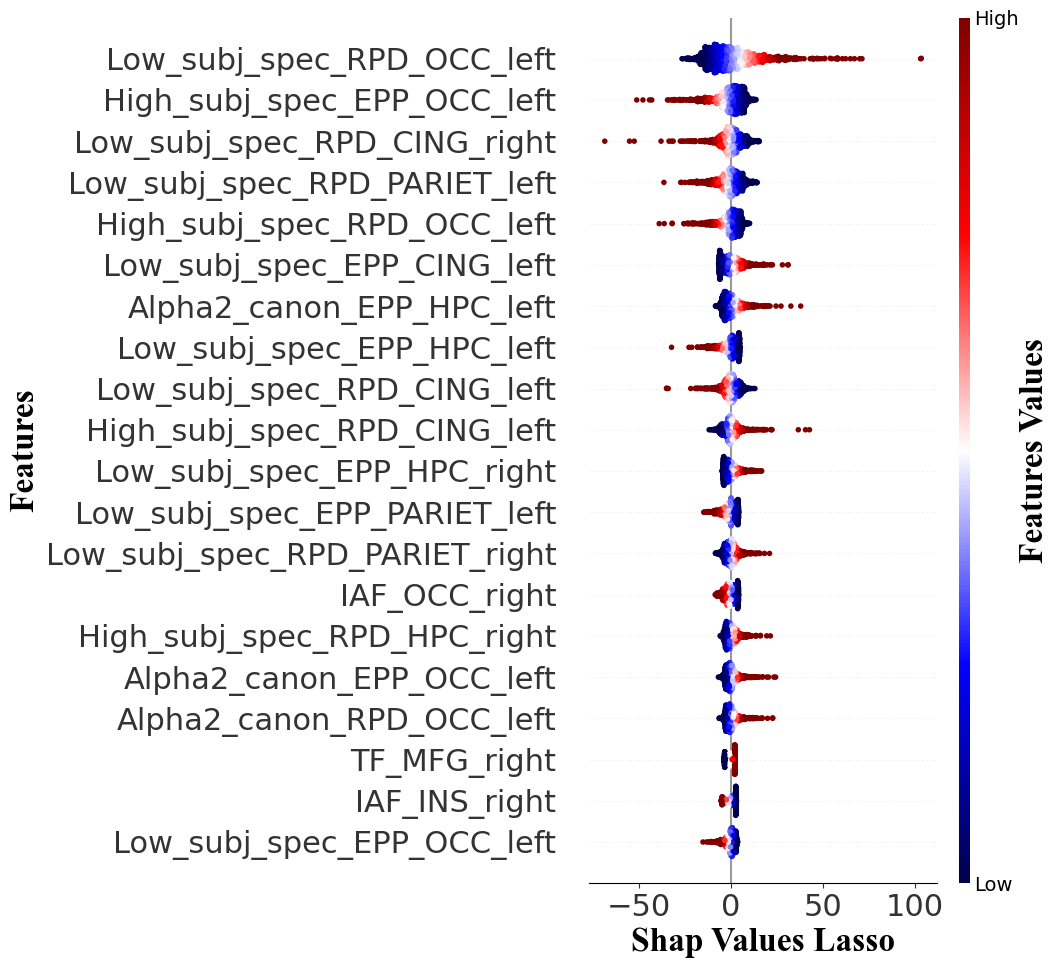

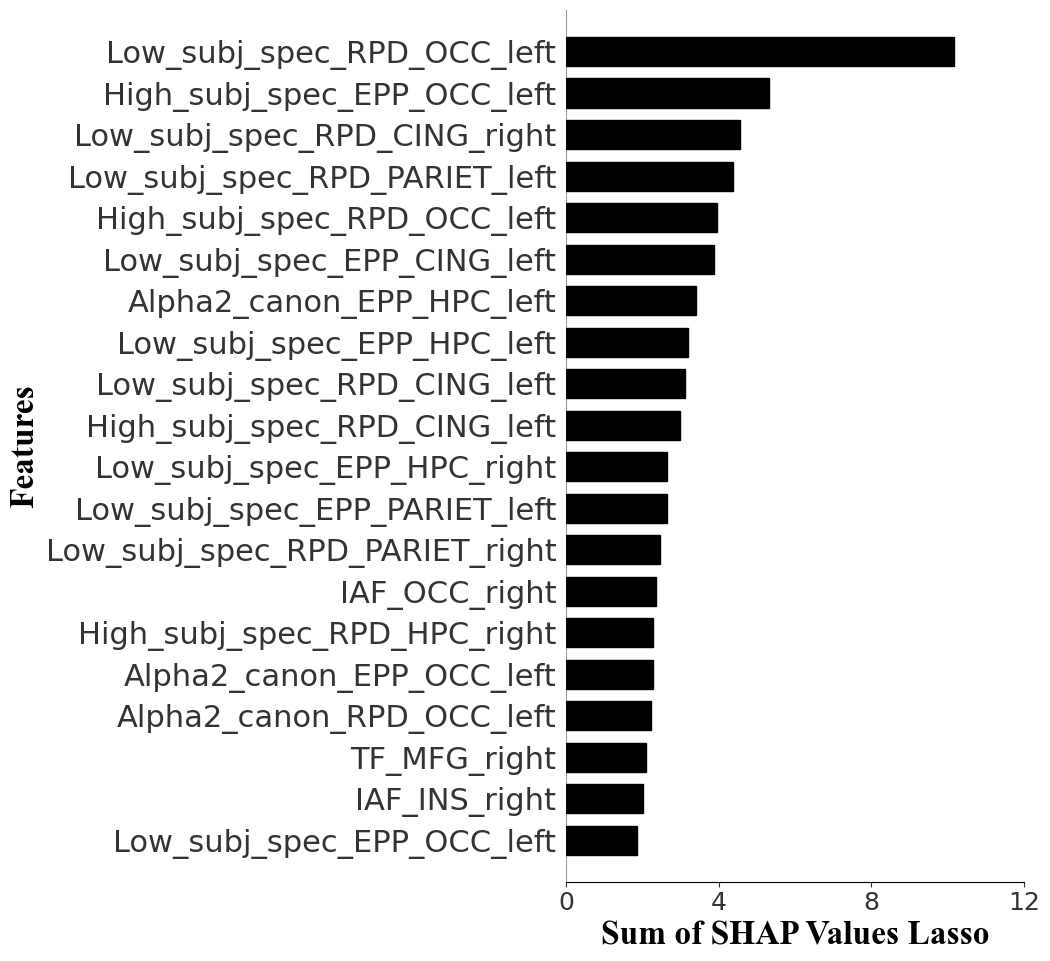

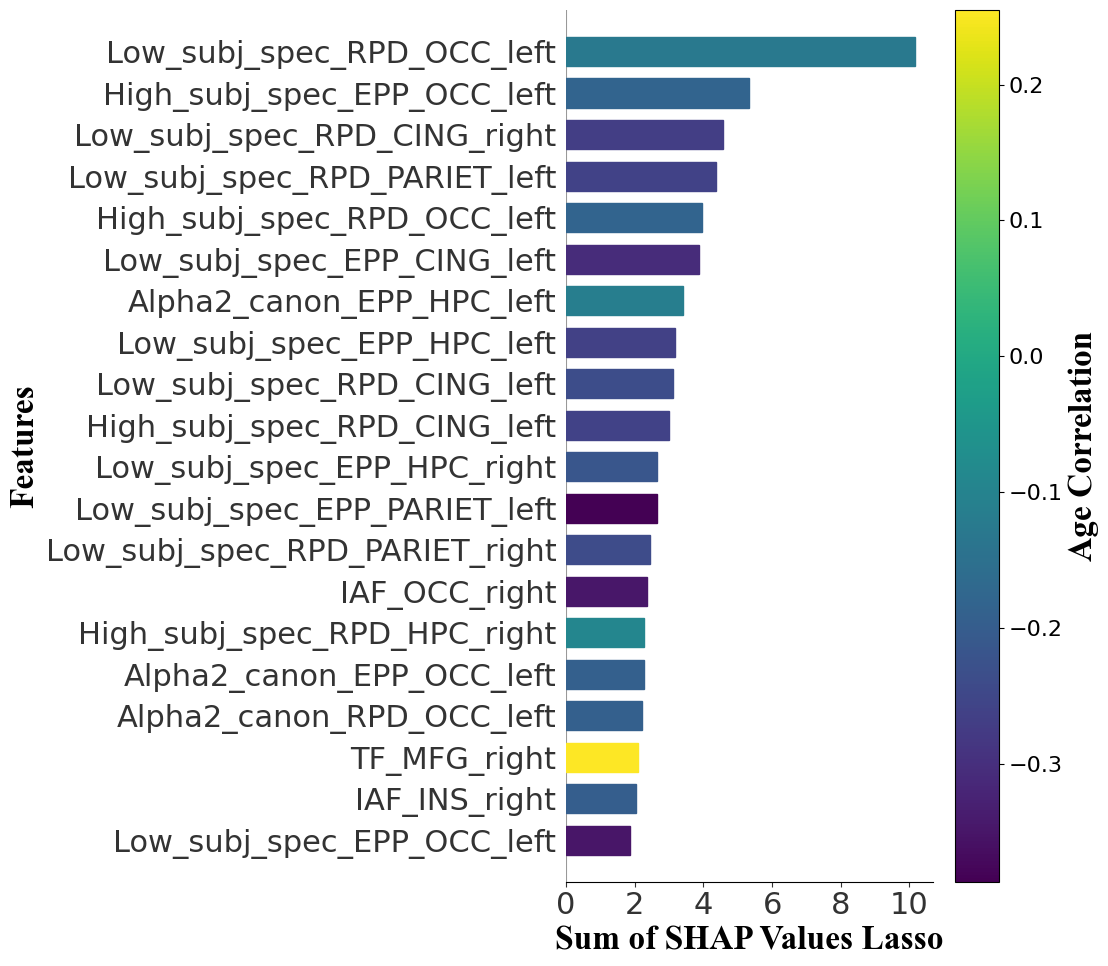

In [ ]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [7]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

OCC_left: 1.000000
CING_left: 0.386207
PARIET_left: 0.272143
HPC_left: 0.255972
HPC_right: 0.191158
CING_right: 0.176992
PARIET_right: 0.095113
OCC_right: 0.091171
MFG_right: 0.081429
INS_right: 0.078621


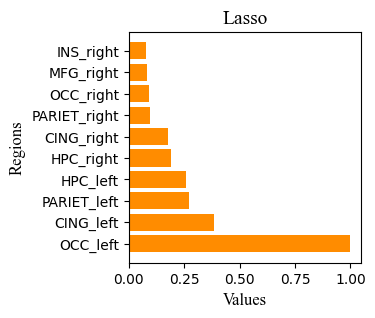

In [8]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


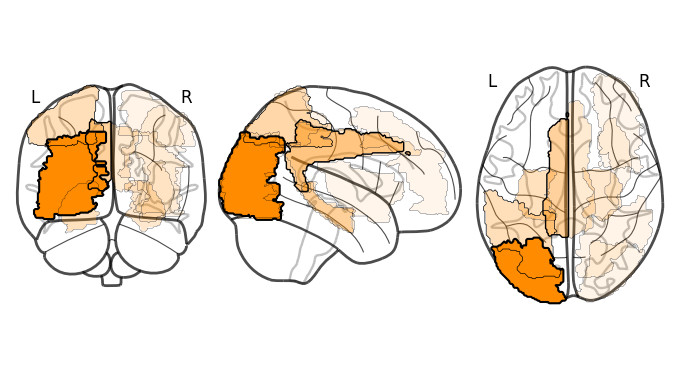

In [9]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)

# Classification

In [16]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
            'objective': ['binary:logistic'],
            'eval_metric': ['logloss', 'error', 'auc', 'aucpr'],
            'learning_rate': Real(0.01, 0.3),
            'max_depth': Integer(3, 10),
            'subsample': Real(0.5, 1.0),
            'colsample_bytree': Real(0.5, 1.0),
            'reg_alpha': Real(0, 1.0),
            'reg_lambda': Real(0, 1.0),
            #'gamma': Real(0.0, 10.0),
            #'min_child_weight': Integer(1, 10),
            #'scale_pos_weight': Real(1.0, 10.0),
            'n_estimators': Integer(100, 2000),  # Número de árboles a probar
            #'n_estimators': [100]
        }

In [17]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=3

In [15]:
df_results_combined =df_CN_results

# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['GAP_corrected'].median()
df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)




C:\Users\felip\AppData\Local\Temp\ipykernel_4312\2760676698.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)


In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID_unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [20]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=30, scoring_metric='accuracy',n_splits=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [21]:
best_params_cls = opt_model_cls.best_params_

In [22]:
best_params_cls

OrderedDict([('colsample_bytree', 0.9934564369085228),
             ('eval_metric', 'error'),
             ('learning_rate', 0.03940059258734427),
             ('max_depth', 9),
             ('n_estimators', 112),
             ('objective', 'binary:logistic'),
             ('reg_alpha', 0.4763608042575218),
             ('reg_lambda', 0.9788280048684005),
             ('subsample', 0.8935553458057169)])

In [23]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X,
        y=y,
        ID_label='ID_unique',
        ID=id,
        n_splits=5,
        n_iterations=20,
        params_=best_params_cls,
        scaler=Scaler
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:196: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([res

In [24]:
# Lista de métricas por fold
metrics_per_fold_cls = [
    model_cls.clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)
        

In [25]:
metrics_

{'AUC': [0.7594202898550724,
  0.7875932062966031,
  0.761122661122661,
  0.8006349206349207,
  0.7279798192137902,
  0.7738793464599917,
  0.7306338028169015,
  0.8015132669983416,
  0.7828781512605043,
  0.7654138513513514,
  0.8074844074844074,
  0.746583850931677,
  0.7554888152444077,
  0.7616438356164382,
  0.740382594071894,
  0.7838345864661656,
  0.7731980115990057,
  0.7533264033264033,
  0.7387415824915825,
  0.7913510101010102,
  0.7096273291925466,
  0.8136645962732919,
  0.7369693148381673,
  0.7760800842992622,
  0.7531672297297297,
  0.7507488232777064,
  0.7620132560066281,
  0.7199419568822554,
  0.7886853448275861,
  0.7234243697478993,
  0.7143008474576271,
  0.7388773388773389,
  0.7949356579493565,
  0.7506024096385542,
  0.7337607735968048,
  0.7416092943201377,
  0.7855072463768116,
  0.7266949152542372,
  0.7564641580828253,
  0.8009249527012824,
  0.7372845733501471,
  0.7608695652173912,
  0.836024844720497,
  0.7344805743243243,
  0.7670454545454546,
  0.725

In [26]:
with open("results_model/metrics_classification.pkl", "wb") as f:
    pickle.dump(metrics_, f)

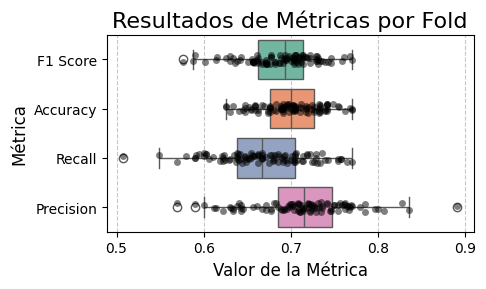

In [27]:
# Crear un DataFrame para las métricas de interés
metrics_df = pd.DataFrame({
    "F1 Score": metrics_["F1 Score"],
    "Accuracy": metrics_["Accuracy"],
    "Recall": metrics_["Recall"],
    "Precision": metrics_["Precision"]
})

Plotters.plot_metrics_clf(metrics_df)

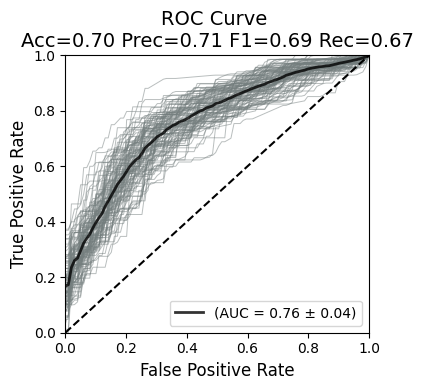

In [28]:
Plotters.graph_roc(metrics_, title="", individual=True, color_avg= 'black',treshold=0.0)


In [29]:
import numpy as np
f_scores, f_score_std, classes = model_cls.calculate_f_scores(metrics_, results_model, threshold=0.0)
print("Promedio de F-scores:", f_scores)
print("Desviación estándar de F-scores:", f_score_std)
print("Características:", classes)

Promedio de F-scores: [304.56, 1245.26, 626.66, 772.19]
Desviación estándar de F-scores: [21.973311084131126, 43.83369023935813, 36.534701312587735, 32.9665572967515]
Características: ['Sex', 'Educ', 'MMSE', 'GINI']


In [30]:
data_to_save = {
    "f_scores": f_scores,
    "f_score_std": f_score_std,
    "classes": classes
}

# Guardar en un archivo pickle
with open("results_model/f_scores_data_classification.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

In [31]:
f_scores

[304.56, 1245.26, 626.66, 772.19]

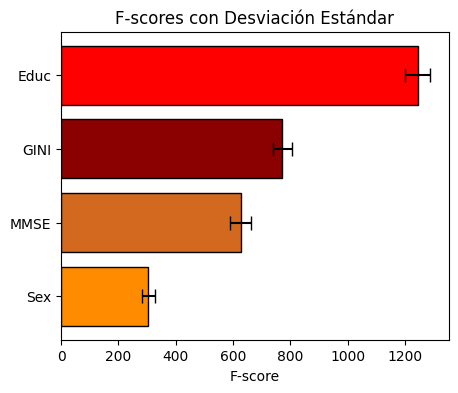

In [32]:
Plotters.plot_f_scores(f_scores, f_score_std, classes, colors=['darkorange', 'red', 'chocolate', 'darkred'],x_size=5)


In [33]:
results_model['model'][0].get_booster().get_score()

{'Sex': 311.0, 'Educ': 1252.0, 'MMSE': 624.0, 'GINI': 777.0}

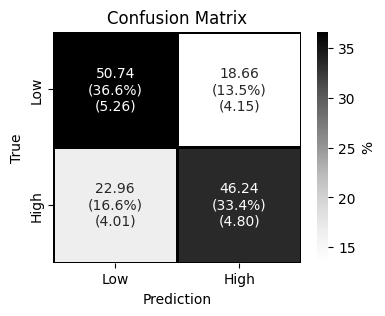

In [34]:
Plotters.C_Matrix(metrics_, threshold=0.0)

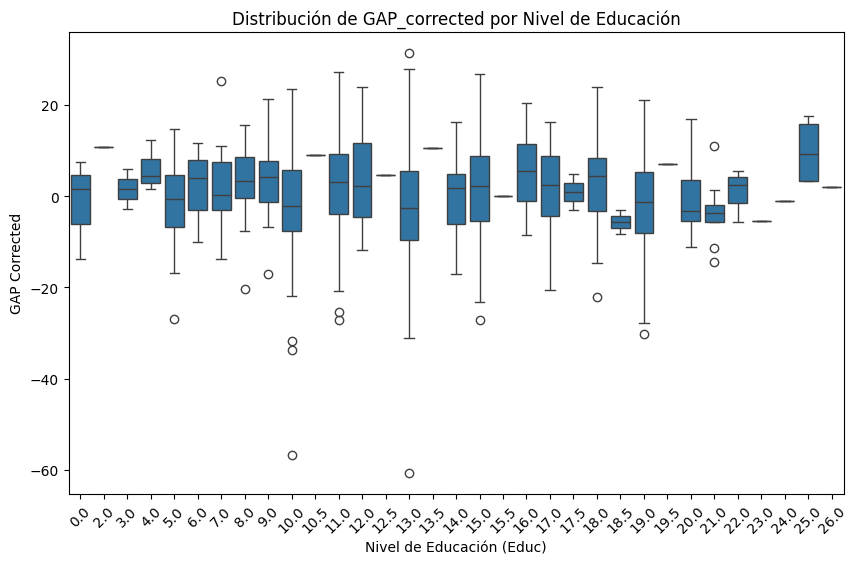

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Educ', y='GAP_corrected', data=df_results_combined)

# Personalizar el gráfico
plt.title('Distribución de GAP_corrected por Nivel de Educación')
plt.xlabel('Nivel de Educación (Educ)')
plt.ylabel('GAP Corrected')
plt.xticks(rotation=45)  # Si es necesario, rota las etiquetas del eje X para mayor claridad

# Mostrar el gráfico
plt.show()


# Clasificador Hernan

In [12]:
from __future__ import division
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
from xgboost import plot_importance
import plotly.graph_objects as go
from tqdm.notebook import tqdm
from sklearn.model_selection import RepeatedKFold
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, mean_squared_error
import seaborn as sns
from statannot import add_stat_annotation
from sklearn.linear_model import Lasso, MultiTaskLasso, Ridge, ElasticNet

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression, f_regression

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn import metrics


from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

import statsmodels.api as sm

import time

import scipy

from sklearn.svm import SVR

from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor

from statsmodels.stats.multitest import fdrcorrection

from statsmodels.stats import multitest

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import ExtraTreesClassifier

from collections import Counter
import heapq

import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor

import re

from sklearn.preprocessing import MinMaxScaler

import os
from scipy.stats import linregress

In [13]:
def classifier_ROC(X_, y, fig_show = True, params_ = None):
    
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=10000, stratify=y)



    cv    = RepeatedKFold(n_splits=10, n_repeats=2, random_state=101)
    folds = [(train,test) for train, test in cv.split(X_train, y_train)]
    metrics = ['auc', 'fpr', 'tpr', 'thresholds', 'f1_score', 'accuracy_score', 'recall_score', 'precision_score', 'confusion_matrix', 'model']
    results = {
        'train': {m:[] for m in metrics},
        'val'  : {m:[] for m in metrics},
        'test' : {m:[] for m in metrics}
    }
    X_train = pd.DataFrame(X_train)
    y_train = pd.DataFrame(y_train)


    if(params_!=None):
        params = params_
    else:
        params = {
            'objective'   : 'binary:logistic',
            'eval_metric' : 'logloss'
        }


    plt.rcParams["figure.figsize"] = (10,10)
    dtest = xgb.DMatrix(X_test, label=y_test)
    for train, test in tqdm(folds, total=len(folds)):
        dtrain = xgb.DMatrix(X_train.iloc[train,:], label=y_train.iloc[train])
        dval   = xgb.DMatrix(X_train.iloc[test,:], label=y_train.iloc[test])
        model  = xgb.train(
            dtrain                = dtrain,
            params                = params, 
            evals                 = [(dtrain, 'train'), (dval, 'val')],
            num_boost_round       = 1000,
            verbose_eval          = False,
            early_stopping_rounds = 10,
        )
        sets = [dtrain, dval, dtest]

        for i,ds in enumerate(results.keys()):
            y_preds              = model.predict(sets[i])
            labels               = sets[i].get_label()
            fpr, tpr, thresholds = roc_curve(labels, y_preds)
            results[ds]['fpr'].append(fpr)
            results[ds]['tpr'].append(tpr)
            results[ds]['thresholds'].append(thresholds)
            results[ds]['auc'].append(roc_auc_score(labels, y_preds))

            results[ds]['f1_score'].append(f1_score(labels, np.round(y_preds)))
            results[ds]['accuracy_score'].append(accuracy_score(labels, np.round(y_preds)))
            results[ds]['recall_score'].append(recall_score(labels, np.round(y_preds)))
            results[ds]['precision_score'].append(precision_score(labels, np.round(y_preds)))
            results[ds]['confusion_matrix'].append(confusion_matrix(labels, np.round(y_preds)))
            results[ds]['model'].append(model)


    kind = 'test'
    c_fill      = 'rgba(52, 152, 219, 0.2)'
    c_line      = 'rgba(52, 152, 219, 0.5)'
    c_line_main = 'rgba(41, 128, 185, 1.0)'
    c_grid      = 'rgba(189, 195, 199, 0.5)'
    c_annot     = 'rgba(149, 165, 166, 0.5)'
    c_highlight = 'rgba(192, 57, 43, 1.0)'

    fpr_mean    = np.linspace(0, 1, 100)
    interp_tprs = []

    for i in range(10*2):
        fpr           = results[kind]['fpr'][i]
        tpr           = results[kind]['tpr'][i]
        interp_tpr    = np.interp(fpr_mean, fpr, tpr)
        interp_tpr[0] = 0.0
        interp_tprs.append(interp_tpr)

    tpr_mean     = np.mean(interp_tprs, axis=0)
    tpr_mean[-1] = 1.0
    tpr_std      = 2*np.std(interp_tprs, axis=0)
    tpr_upper    = np.clip(tpr_mean+tpr_std, 0, 1)
    tpr_lower    = tpr_mean-tpr_std
    auc          = np.mean(results[kind]['auc'])
    
    roc_dict = {}
    roc_dict['tpr_mean'] = tpr_mean
    roc_dict['tpr_std'] = tpr_std
    roc_dict['tpr_upper'] = tpr_upper
    roc_dict['tpr_lower'] = tpr_lower
    roc_dict['auc'] = auc

    if(fig_show):
        fig = go.Figure([
            go.Scatter(
                x          = fpr_mean,
                y          = tpr_upper,
                line       = dict(color=c_line, width=1),
                hoverinfo  = "skip",
                showlegend = False,
                name       = 'upper'),
            go.Scatter(
                x          = fpr_mean,
                y          = tpr_lower,
                fill       = 'tonexty',
                fillcolor  = c_fill,
                line       = dict(color=c_line, width=1),
                hoverinfo  = "skip",
                showlegend = False,
                name       = 'lower'),
            go.Scatter(
                x          = fpr_mean,
                y          = tpr_mean,
                line       = dict(color=c_line_main, width=2),
                hoverinfo  = "skip",
                showlegend = True,
                name       = f'AUC: {auc:.3f}')
        ])

        fig.add_shape(
            type ='line', 
            line =dict(dash='dash'),
            x0=0, x1=1, y0=0, y1=1
        )

        fig.update_layout(
            template    = 'plotly_white', 
            title_x     = 0.5,
            xaxis_title = "1 - Specificity",
            yaxis_title = "Sensitivity",
            width       = 800,
            height      = 800,
            legend      = dict(
                yanchor="bottom", 
                xanchor="right", 
                x=0.95,
                y=0.01,
            )
        )

        fig.update_yaxes(
            range       = [0, 1],
            gridcolor   = c_grid,
            scaleanchor = "x", 
            scaleratio  = 1,
            linecolor   = 'black')

        fig.update_xaxes(
            range       = [0, 1],
            gridcolor   = c_grid,
            constrain   = 'domain',
            linecolor   = 'black')



        fig.show()
        
    else:
        print(y.name, 'AUC: ', np.round(auc,2), '+-( ', np.round(np.std(results[kind]['auc']),2), ')', X_.shape)

    return (model, results, np.round(auc,2), roc_dict)

In [14]:
from skopt import BayesSearchCV
def SearchBestModel(case_x, case_y):

    X_train, X_test, y_train, y_test = train_test_split(case_x, case_y, test_size=.2, random_state=1)

    opt_XGB = BayesSearchCV(
            XGBClassifier(),
            {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            },
                          
            #n_iter=10,
            #cv=3,
            random_state=1
        )

    opt_XGB.fit(X_train, y_train)


    print('XGB')
    print("val. score: %s" % opt_XGB.best_score_)
    print("test score: %s" % opt_XGB.score(X_test, y_test))
    print("best parameters: %s" % str(opt_XGB.best_params_))
    print('---------------------------------------------\n')
    
    return opt_XGB

In [17]:
opt_XGB = SearchBestModel(X, y)
params_ = dict(opt_XGB.best_params_)

r = classifier_ROC(X, y, False, params_)

XGB
val. score: 0.7165929565929565
test score: 0.6906474820143885
best parameters: OrderedDict({'colsample_bytree': 1.0, 'eval_metric': 'logloss', 'learning_rate': 0.01, 'max_depth': 4, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.9})
---------------------------------------------



ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [23]:
import ipywidgets
from tqdm import tqdm


In [25]:
r = classifier_ROC(X, y, True, params_)












100%|██████████| 20/20 [00:01<00:00, 10.21it/s]


In [42]:
r[1]['train']['model'][0].get_score(importance_type='weight')

{'Sex': 503.0, 'Educ': 2039.0, 'MMSE': 1159.0, 'GINI': 1355.0}